### KNN 

### Table of Contents

* [1. Preparation](#Preparation)
* [2 Model Building](#modelBuilding)
* [3. Training and Evaluation](#training)
    * [Evaluate with only tokenization 1.1](#section_1_1)
    * [Evaluate with stopwords removal](sSection_1_2)
    * [Evaluate with Stemming](sSection_1_2)
    * [Evaluate with Upsampling](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [3. Deal with imbalanced classes](#training)

### 1. Preparation <a class="anchor" id="Preparation"></a>

In [1]:
!pip install datasets

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install demoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install mlxtend

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
# import libraries


import seaborn as sns
import pandas as pd
import numpy as np
import itertools
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
#sys.path.append(os.path.dirname((os.path.abspath(''))))

path = "preprocessing.py"

file_name = os.path.abspath(os.path.join(os.path.dirname( 'data'), '..'))
file_name = os.path.abspath(path)
print(file_name)
#from src.data.preprocessing import setup



import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin, TransformerMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from  sklearn.feature_extraction.text import TfidfTransformer
SEED = 1234

from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from IPython.core.display import HTML



from datasets import list_datasets, load_dataset
from pprint import pprint

from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore')

C:\Users\D073999\Documents\uni-Mannheim\Data_Mining_I\Data_mining\src\models\preprocessing.py


In [5]:
import os

path = "KNN.ipynb"

file_name = os.path.abspath(os.path.join(os.path.dirname( 'models'), '.'))
file_name = os.path.abspath(path)

print(file_name)

C:\Users\D073999\Documents\uni-Mannheim\Data_Mining_I\Data_mining\src\models\KNN.ipynb


In [7]:
import sys  
sys.path.insert(0, 'C:\\Users\\D073999\\Documents\\uni-Mannheim\\Data_Mining_I\\Data_mining\\src\\data')

from preprocessing import preprocess,load_data, convert_emoji, upsampling, setup
#from src.data import preprocessing

In [8]:
tfidf, df_train, df_test = setup(do_emojis=True)

2022-05-21 10:51:25,175 WARNING Using custom data configuration default
2022-05-21 10:51:25,207 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
class DownloadManager():
    def __init__(self):
        self.db = DBManager()
        #self.data_transformer = Transformer()
        
    def fit(self):
        df = db.load_data()
        df = db.replace_user(df)
        X, y = db.target_feature_selection(df)
        X_train, X_test, y_train, y_test = db.split_data(X, y)
        
        return self

In [8]:
class SegmentFeaturizer():
    def __init__(self):
        self.porter_stemmer = PorterStemmer()
    
    @staticmethod
    def replace_user(df):
        assert isinstance(df, pd.DataFrame), "input musst be a data-frame"
        df['tweet']= df['tweet'].str.replace("@user","")
        print("removed @user")
        return df

    
    # Currently not in use
    @staticmethod
    def remove_punctioation(text:str) -> str:
        return "".join([i for i in text if i not in punctuation])

    @staticmethod
    def tokenization(text:str) -> list:
        return nltk.word_tokenize(text)
    
    @staticmethod
    def remove_stopwords(tokens) ->list:
        stopwords_list = stopwords.words("english")
        return [token for token in tokens if token not in stopwords_list]

    
   
    def stemming(self, text:str) -> list:
        return [self.porter_stemmer.stem(word) for word in text]

    @staticmethod
    def lower_case(row):
        return row_lower()
        #return row.apply(lambda x: stemming(remove_stopwords(tokenization(remove_punctioation(x.lower())))))
     
    @staticmethod
    def convert_emoji(text: str):
        return emoji.demojize(text.lower(), language='en')
    
    

    def dummy(self, text):
        return text
    
    
    def featurize(self, data):
        df['tweet']= df['tweet'].str.replace("@user","")
        #data['tweet'] = data['tweet'].progress_apply(self.lower_case)
        print("Remove emojis..")
        data['removed_emoji'] =  data['tweet'].progress_apply(convert_emoji)
        print("Tokenized..")
        data['tokenized'] = data['removed_emoji'].progress_apply(self.tokenization)
        print("Remove Stopwords ...")
        data['remove_stopwords'] = data['tokenized'].progress_apply(self.remove_stopwords)
        print("stemming..")
        data['stemmed_words'] = data['remove_stopwords'].progress_apply(self.stemming)
        
        feature_dict = {
                "tokenized_sentence": data['tokenized'],
                "remove_stopwords": data['remove_stopwords'],
                "stemmed_words": data['stemmed_words'],
                "removed_emoji": data['removed_emoji'],
                #"lower_case": data['lower_case']
            }
        return data

In [9]:
SEED = 1234
class DBManager(SegmentFeaturizer):
    def __init__(self):
        super().__init__()
    
    def __str__(self):
            return repr(self) + " load, splitt, process & encode data"
    
    def list_avaliable_data(self):
        datasets_list = list_datasets() 
        pprint(datasets_list)
    
    
    def load_data(self, data_name : str = "tweets_hate_speech_detection"):
        dataset = load_dataset(data_name)
        df = pd.DataFrame.from_dict(dataset['train'])
        print(f'{data_name} has been loaded with the shape of {df.shape}')
        return df
    
    
    def target_feature_selection(self, df):
        print('target feature selection')
        print(f'Select X as {df.columns.values.tolist()[0]} & y as {df.columns.values.tolist()[1]}')
        return df['tweet'], df['label']
    
        
    def split_data(self, X, y, test_size= 0.2, random_state= SEED):
         return ms.train_test_split(
                                     X,
                                     y,
                                     test_size=test_size,
                                     random_state = 17,
                                     stratify=y);

In [10]:
### 2 Downl <a class="anchor" id="chapter2"></a>

In [11]:
db = DBManager()
df = db.load_data()

2022-05-20 23:37:03,225 WARNING Using custom data configuration default
2022-05-20 23:37:03,236 WARNING Reusing dataset tweets_hate_speech_detection (C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

tweets_hate_speech_detection has been loaded with the shape of (31962, 2)


In [12]:
data = db.featurize(df)

Remove emojis..


100%|██████████████████████████████████████████████████████████████████████████| 31962/31962 [00:13<00:00, 2360.00it/s]


Tokenized..


100%|██████████████████████████████████████████████████████████████████████████| 31962/31962 [00:04<00:00, 7243.38it/s]


Remove Stopwords ...


100%|██████████████████████████████████████████████████████████████████████████| 31962/31962 [00:20<00:00, 1590.17it/s]


stemming..


100%|██████████████████████████████████████████████████████████████████████████| 31962/31962 [00:05<00:00, 6147.45it/s]


In [13]:
data

,label,tweet,removed_emoji,tokenized,remove_stopwords,stemmed_words
0,0,when a father is dysfunctional and is so self...,when a father is dysfunctional and is so self...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc..."
1,0,thanks for #lyft credit i can't use cause th...,thanks for #lyft credit i can't use cause th...,"[thanks, for, #, lyft, credit, i, ca, n't, use...","[thanks, #, lyft, credit, ca, n't, use, cause,...","[thank, #, lyft, credit, ca, n't, use, caus, n..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]"
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","[#, model, love, u, take, u, time, urmobile, p...","[#, model, love, u, take, u, time, urmobil, ph..."
4,0,factsguide: society now #motivation,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, #, motivation]","[factsguid, :, societi, #, motiv]"
...,...,...,...,...,...,...
31957,0,ate isz that youuu?ððððððð...,ate isz that youuu?smiling face with heart-ey...,"[ate, isz, that, youuu, ?, smiling, face, with...","[ate, isz, youuu, ?, smiling, face, heart-eyes...","[ate, isz, youuu, ?, smile, face, heart-ey, sm..."
31958,0,to see nina turner on the airwaves trying to w...,to see nina turner on the airwaves trying to w...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, trying, wrap, ma...","[see, nina, turner, airwav, tri, wrap, mantl, ..."
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor...","[listening, sad, songs, monday, morning, otw, ...","[listen, sad, song, monday, morn, otw, work, sad]"
31960,1,"#sikh #temple vandalised in in #calgary, #wso...","#sikh #temple vandalised in in #calgary, #wso...","[#, sikh, #, temple, vandalised, in, in, #, ca...","[#, sikh, #, temple, vandalised, #, calgary, ,...","[#, sikh, #, templ, vandalis, #, calgari, ,, #..."


In [14]:
segment_featurizer = SegmentFeaturizer()  # more on this below
class CustomLinguisticFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, data):
        return segment_featurizer.featurize(data)

### 1. Upload & Splitt Data

### 1.1 check the distribution of labels, i.e. labels-distribution on test are to some extent reasonable

In [ ]:
ax=sns.countplot(df_train.label);

In [ ]:
ax=sns.countplot(df_test.label);

In [ ]:
print(f'label distribution on train:\n {y_train.value_counts()}')
print(80*'-')
print(f'label distribution on test:\n {y_test.value_counts()}')

In [ ]:
y_train = df_train['label']; X_train = df_train.drop(columns=['label'])
y_test = df_test['label']; X_test = df_test.drop(columns=['label'])
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

In [ ]:
X_t_copy = X_train
y_t_copy = y_train
X_s_copy = X_test
y_s_copy = y_test

### TFIDF Embedding

In [15]:
class TFIDFTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.tf_idf = text.TfidfVectorizer(stop_words='english')

    def fit(self, X, y=None, tf_idf=True):
        print("Embedding using TFIDF started")
        #X = check_array(X, accept_sparse=False)
        if np.array(X).ndim >= 2: 
            self.n_features_in_ = X.shape[1]
            self.n_features_ = X.shape[1]
        X = super().fit_transform(X)
        self._tf_idf.fit(X)
        self.is_fitted_ = True

        return self
            

    def transform(self, X):
        check_is_fitted(self, ['is_fitted_'])

        #X = check_array(X, accept_sparse=False)
        if np.array(X).ndim >= 2:
            if X.shape[1] != self.n_features_:
                raise ValueError('Shape of input is different from what was seen in `fit`')


        return self.tf_idf.transform(X)

### Countvectorizer

In [16]:
class CountTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.co = text.CountVectorizer(stop_words='english')

    def fit(self, X, y=None, tf_idf=True):
        print("Embedding using CountVectorizer started")
        if np.array(X).ndim >= 2: 
            self.n_features_in_ = X.shape[1]
            self.n_features_ = X.shape[1]
        X = self.co.fit(X)
        self.is_fitted_ = True
        return self
            

    def transform(self, X):
        check_is_fitted(self, ['is_fitted_'])

        #X = check_array(X, accept_sparse=False)
        if np.array(X).ndim >= 2:
            if X.shape[1] != self.n_features_:
                raise ValueError('Shape of input is different from what was seen in `fit`')
        return self.co.transform(X)

In [17]:
import functools
import time


def time_decorater(function):

    @functools.wraps(function)
    def time_measurement(*args, **kwargs):
        start = time.perf_counter()
        result = function(*args, **kwargs)
        end = time.perf_counter()
        print("function: {} finished in {} seconds.".format(repr(function.__name__), round((end - start), 2)))
        return result

    return time_measurement

# 2. Model Building <a class="anchor" id="modelBuilding"></a>

In [40]:
class KNN_DM(BaseEstimator, ClassifierMixin):
    
    def __init__(self):
        pass    
                
    
    def __get_pipeline(self):
        
            classifier = KNeighborsClassifier(**{
                'n_neighbors': 3
            })

            steps=[
                #("vect",  CountVectorizer()),
                #("tfidf", TfidfTransformer()),
                ('clf', classifier)]

            self.pipeline = Pipeline(steps=steps)
            return self.pipeline
    
    
    def __get_model(self, feature_range, n_estimators, X, y): 
        
        self.parameters = {
                'clf__n_neighbors': n_estimators,                                   
                'clf__algorithm': ['ball_tree', 'kd_tree', 'auto'],          
                'clf__metric': ['euclidean', 'manhattan']
        }
        """self.parameters = {
                'clf__n_neighbors': n_estimators.
                'clf__metric': ['l1', 'l2']
        }"""
        grid_search = GridSearchCV(**{
                'estimator': self.__get_pipeline(),
                'cv': 2,
                'param_grid': self.parameters,
                'scoring': 'f1',#{'F1': 'f1', 'Precision': 'precision', 'Recall':'recall'},
                 'refit': True,
                'verbose': 5,
                 'n_jobs': -1
            })
        return grid_search
    
    @time_decorater
    def fit(self, X, y, optim):
        print(100* '-')
        display(HTML("<h4>[1/5] Started Fitting...</h4>"))
        if y is None:
                raise ValueError('requires y to be passed, but the target y is None')
        
        X, y = check_X_y(X, y)
        self.is_fitted_ = True
        if optim:
            self.model_ = self.__get_model(feature_range=None, n_estimators =[3,5,10], X =X, y=y) #np.arange(1, 21)
            print("Performing grid search...")
            print("pipeline:", [name for name, _ in self.pipeline.steps])
            print("parameters:")
            pprint(self.parameters)
            #t0 = time()
            self.model_.fit(X, y)
            #print("done in %0.3fs" % (time() - t0))
            print("Done")
            print()

            print("Best score: %0.3f" % self.model_.best_score_)
            print("Best parameters set:")
            best_parameters = self.model_.best_estimator_.get_params()
            for param_name in sorted(self.parameters.keys()):
                print("\t%s: %r" % (param_name, best_parameters[param_name]))
        else:
            # if not opt true, create knn with default 3 neigh.
            self.model_  = KNeighborsClassifier(**{
                    'n_neighbors': 3
                })

            self.model_ .fit(X, y)
        print()
        return self
            
    @time_decorater        
    def predict(self, X, y=None):
        print(100* '-')
        display(HTML("<h4>[2/5] Started Prediction...</h4>"))
        self.y_test = y
        #check_is_fitted(self, ['is_fitted_', 'model_'])
        X = check_array(X)
        self.y_pred = self.model_.predict(X)
        print("head of y_pred is \t%s: " % (self.y_pred[0:6]))
        print()
        return self.y_pred #self.model_.predict(X)
    
    @time_decorater
    def predict_proba(self, X, y=None):
        print(100* '-')
        display(HTML("<h4>Started Predicting Model confidence...</h4>"))
        print()
        return self.model_ .predict_propa(X, y)
     
    @time_decorater
    def evaluate(self, title = "KNN Classifier on Test Set"):
        print(100* '-')
        display(HTML("<h4>[3/5] Started Evaluation...</h4>"))
     
        f1 = f1_score(self.y_test, self.y_pred)
        accuracy = accuracy_score(self.y_test, self.y_pred)*100
        recall = recall_score(self.y_test, self.y_pred)
        precision = precision_score(self.y_test, self.y_pred)
        
        #scores
        print("f1-score         \t%s: " % (f1))
        print("accuracy-score   \t%s: " % (accuracy))
        print("precision-score  \t%s: " % (precision))
        print("recall-score     \t%s: " % (recall))
        print()
        self.report = self.print_report(self.y_test, self.y_pred)
        cm = confusion_matrix(self.y_test, self.y_pred)
        self.__plot_confusion_matrix(cm, unique_labels(self.y_test),  title = title) #classes = np.unique(y_train),
        
        return self.report, accuracy, recall, precision, f1
    
    @staticmethod
    @time_decorater  
    def print_report(y_test, y_pred):
        print(100* '-')
        display(HTML("<h4>[4/5] Started creating a report...</h4>"))
        report = classification_report(y_test, y_pred, output_dict=True)
        report = pd.DataFrame(report).transpose()
        display(report)
        print()
        return report
        
    @staticmethod   
    @time_decorater   
    def __plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        print(100* '-')
        display(HTML("<h4>[5/5] Started plotting the confusion matrix...</h4>"))
        print("Start plotting the confusion matrix...\n")
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [26]:
#X_train = np.array(X_train)
#knn = KNeighborsClassifier()
#print(knn.get_params().keys())
#check_estimator(KNN_DM())
#knn = KNN_DM()

In [10]:
df_train.head()

,label,preprocessed
30405,0,"[everyon, free, your, exam, mode, wtf, badtim,..."
27807,0,"[jacksonvil, rooster, simul, want, climb, vast..."
8660,0,"[user, run, 10km, user, user, loveisal, pour, ..."
19185,0,"[user, got, prototyp, new, usb, today, think, ..."
10355,0,"[amp, healthi, fathersday, runnerdad, eathealt..."


In [13]:
# prepare data 
data['emojis_to_text'] =  preprocess(df_train['preprocessed'], rem_stop=False, do_stem=False, do_lem=False, do_emojis=True)
#data['tokenized'] = preprocess(df_train['emojis_to_text'], rem_stop=False, do_stem=False, do_lem=False, do_emojis=False)  
#data['removed_stopwords'] = preprocess(df_train['tokenized'], rem_stop=True, do_stem=False, do_lem=False, do_emojis=False)  
#data['stemmed_words'] = preprocess(df_train['removed_stopwords'], rem_stop=False, do_stem=True, do_lem=False, do_emojis=False)

TypeError: ord() expected a character, but string of length 7 found

# 3. Training & Evaluation  <a class="anchor" id="training"></a>

### try differnt steps to find the best ones to choosse
accroding to previous tries, removing the emoji have a positive effect to the accuracy
so, this step will not be perfromed. 
follows the steps will be performed:

1- tokenization

2- stopwords removal

3- stemming 

4- upsampling

In [28]:
results = []

# 1. With only Tokenization

In [29]:
# Only tokenization 
df[['tweet', 'label']] = data[['tokenized', 'label']]
X, y = db.target_feature_selection(df)
# Splitting of data into training and test data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state = 17, stratify=y)

target feature selection
Select X as label & y as tweet


In [21]:
def convert_to_tf_idf(X_train, X_test):
    count_vect = CountVectorizer(stop_words='english')
    transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
    xd = pd.Series(X_train)
    text = xd.map(' '.join)
    X_train_counts = count_vect.fit_transform(text)
    X_train = transformer.fit_transform(X_train_counts)
    print(X_train_counts.shape)
    print(X_train.shape)
    text = X_test.map(' '.join)
    X_test_counts = count_vect.transform(text)
    X_test = transformer.transform(X_test_counts)
    print(X_test_counts.shape)
    print(X_test.shape)
    return X_train, X_test, X_train_counts, X_test_counts

## 1.1. Using TF-IDF

In [31]:
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

(25569, 34768)
(25569, 34768)
(6393, 34768)
(6393, 34768)


<25569x34768 sparse matrix of type '<class 'numpy.float64'>'
	with 203529 stored elements in Compressed Sparse Row format>

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 3.71 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 48.75 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.3202979515828678: 
accuracy-score   	94.29063037697482: 
precision-score  	0.9662921348314607: 
recall-score     	0.19196428571428573: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.942576,0.999495,0.970202,5945.000000
1,0.966292,0.191964,0.320298,448.000000
accuracy,0.942906,0.942906,0.942906,0.942906
macro avg,0.954434,0.595730,0.645250,6393.000000
weighted avg,0.944238,0.942906,0.924659,6393.000000



function: 'print_report' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.08 seconds.
function: 'evaluate' finished in 0.1 seconds.



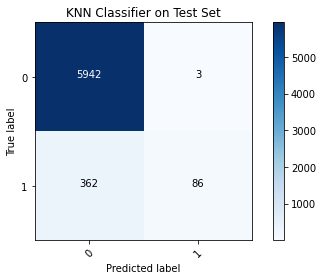

In [32]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
"""results_a.append({
                'activation function__'+str(i): fct_names[idx],
                "layers": com['layers'][i],
                "training error": training_error,
                "test error": test_error
            })"""
print()

## 1.2 Using Count-Vectroizer

 ### classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.0 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 56.66 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.3623445825932504: 
accuracy-score   	94.38448302831222: 
precision-score  	0.8869565217391304: 
recall-score     	0.22767857142857142: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.944887,0.997813,0.970629,5945.000000
1,0.886957,0.227679,0.362345,448.000000
accuracy,0.943845,0.943845,0.943845,0.943845
macro avg,0.915922,0.612746,0.666487,6393.000000
weighted avg,0.940827,0.943845,0.928003,6393.000000



function: 'print_report' finished in 0.04 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.09 seconds.
function: 'evaluate' finished in 0.17 seconds.



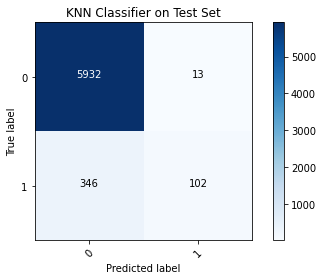

In [33]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

# 2 with only Removing Stopwords

In [ ]:
# Only tokenization 
df[['tweet', 'label']] = data[['remove_stopwords', 'label']]
X, y = db.target_feature_selection(df)
# Splitting of data into training and test data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state = 17, stratify=y)

### vectorize with tfidf countvectorizer
   

In [ ]:
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

## 2.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

In [ ]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

## 2.2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.0 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 62.61 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.36332179930795844: 
accuracy-score   	94.24370405130612: 
precision-score  	0.8076923076923077: 
recall-score     	0.234375: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.945234,0.995795,0.969856,5945.000000
1,0.807692,0.234375,0.363322,448.000000
accuracy,0.942437,0.942437,0.942437,0.942437
macro avg,0.876463,0.615085,0.666589,6393.000000
weighted avg,0.935595,0.942437,0.927352,6393.000000



function: 'print_report' finished in 0.04 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.1 seconds.
function: 'evaluate' finished in 0.19 seconds.



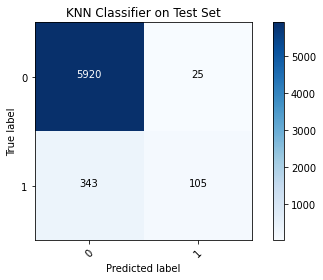

In [68]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

# 3 with  Stemming

In [69]:
# Only tokenization 
df[['tweet', 'label']] = data[['stemmed_words', 'label']]
X, y = db.target_feature_selection(df)
# Splitting of data into training and test data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state = 17, stratify=y)

target feature selection
Select X as label & y as tweet


### vectorize with tfidf countvectorizer

In [70]:
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

(25569, 30055)
(25569, 30055)
(6393, 30055)
(6393, 30055)


<25569x30055 sparse matrix of type '<class 'numpy.float64'>'
	with 201642 stored elements in Compressed Sparse Row format>

## 3.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 3.01 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 44.24 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.3171641791044776: 
accuracy-score   	94.27498826841858: 
precision-score  	0.9659090909090909: 
recall-score     	0.18973214285714285: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.942427,0.999495,0.970122,5945.00000
1,0.965909,0.189732,0.317164,448.00000
accuracy,0.942750,0.942750,0.942750,0.94275
macro avg,0.954168,0.594614,0.643643,6393.00000
weighted avg,0.944072,0.942750,0.924365,6393.00000



function: 'print_report' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.05 seconds.
function: 'evaluate' finished in 0.07 seconds.



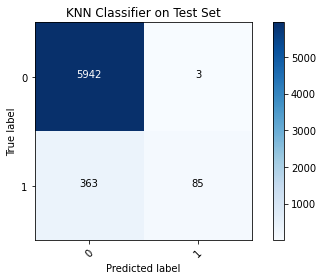

In [71]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

## 3 .2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.0 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 47.6 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.3875432525951557: 
accuracy-score   	94.46269357109338: 
precision-score  	0.8615384615384616: 
recall-score     	0.25: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.946352,0.996972,0.971003,5945.000000
1,0.861538,0.250000,0.387543,448.000000
accuracy,0.944627,0.944627,0.944627,0.944627
macro avg,0.903945,0.623486,0.679273,6393.000000
weighted avg,0.940408,0.944627,0.930116,6393.000000



function: 'print_report' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.05 seconds.
function: 'evaluate' finished in 0.08 seconds.



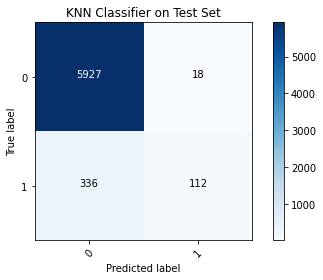

In [72]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

# 4 with Upsampling

In [ ]:
# best results were achieved after the stemming and count_vectorizer therefore this will be upsampled


In [19]:
df[['tweet', 'label']] = data[['stemmed_words', 'label']]
X, y = db.target_feature_selection(df)
# Splitting of data into training and test data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state = 17, stratify=y)

target feature selection
Select X as label & y as tweet


In [35]:
new_df = df.copy()
new_df['label'] = y_train
new_df['tweet'] = X_train

In [36]:
# upsample train set
df = upsampling(new_df)
df.label.value_counts()

0.0    23775
1.0    23775
Name: label, dtype: int64

In [37]:
X_train = df['tweet']
y_train = df['label']

### vectorize with tfidf countvectorizer

In [22]:
X_train, X_test, X_train_c, X_test_c = convert_to_tf_idf(X_train, X_test); X_train

(25569, 30055)
(25569, 30055)
(6393, 30055)
(6393, 30055)


<25569x30055 sparse matrix of type '<class 'numpy.float64'>'
	with 201644 stored elements in Compressed Sparse Row format>

## 4.1 Using TF-IDF

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 5.8 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0. 0. 0. 0. 0. 0.]: 

function: 'predict' finished in 82.4 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.5333333333333333: 
accuracy-score   	95.29172532457375: 
precision-score  	0.8730964467005076: 
recall-score     	0.38392857142857145: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.955455,0.995795,0.975208,5945.000000
1,0.873096,0.383929,0.533333,448.000000
accuracy,0.952917,0.952917,0.952917,0.952917
macro avg,0.914276,0.689862,0.754271,6393.000000
weighted avg,0.949684,0.952917,0.944243,6393.000000



function: 'print_report' finished in 0.02 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.05 seconds.
function: 'evaluate' finished in 0.07 seconds.



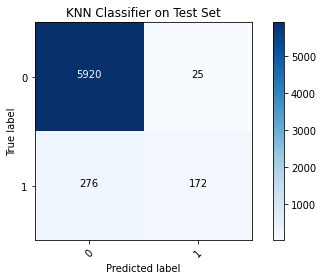

In [39]:
knn = KNN_DM()
model = knn.fit(X_train.toarray(), y_train, optim=False)
y_pred = model.predict(X_test.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

## 4 .2 Using Count-Vectroizer

###  classification, Evaluation & plotting with only tokenization

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.0 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0 0 0 0 0 0]: 

function: 'predict' finished in 64.31 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.3875432525951557: 
accuracy-score   	94.46269357109338: 
precision-score  	0.8615384615384616: 
recall-score     	0.25: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.946352,0.996972,0.971003,5945.000000
1,0.861538,0.250000,0.387543,448.000000
accuracy,0.944627,0.944627,0.944627,0.944627
macro avg,0.903945,0.623486,0.679273,6393.000000
weighted avg,0.940408,0.944627,0.930116,6393.000000



function: 'print_report' finished in 0.08 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.16 seconds.
function: 'evaluate' finished in 0.29 seconds.



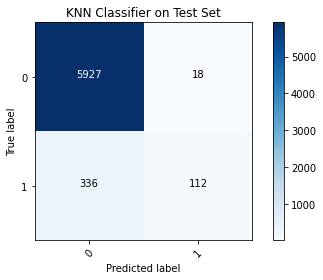

In [23]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

### Hyperparameter optimization

In [42]:
knn = KNN_DM()
model = knn.fit(X_train_c.toarray(), y_train, optim=True)

----------------------------------------------------------------------------------------------------


Performing grid search...
pipeline: ['clf']
parameters:
{'clf__algorithm': ['ball_tree', 'kd_tree', 'auto'],
 'clf__metric': ['euclidean', 'manhattan'],
 'clf__n_neighbors': [3, 5, 10]}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


MemoryError: Unable to allocate 2.86 GiB for an array with shape (12785, 30055) and data type int64

### Impalanced classes

F1-score is very low, 
try to find tech. that specifically target the f-1 (like ensambles targets  overfitting).
the idea is rather to deal with imbalanced classes and not directly the f1-score, but as a result of handling the 
imbalance state in the right way, the f1-score should also be boosted:

1- use Ensembles or balanced-bagging-classifier: this is a rather simple solution and redandant, it is a normal classifier
but it will resample the data without having to use a sampler, so the results should be the same as if one resampled and then used another normal classifier

2- Resampling like resample from sklearn: already used above

3- SMOTE Synthetic Minority Oversampling Technique: oversampling the minor class by creating synthetic examples
    form original data and not only deleting or duplicating the examples
    
4- Threshold moving: most of the learners in sklearn have predict_proba, which give a probabillity 

In [41]:
from imblearn.ensemble import BalancedBaggingClassifier
# KNeighborsClassifier
# KNN_DM is just a convient way to reuse the code, it will not work on all cases, because, 
#they are not covered during the impl.
# in this case we use the original classifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train_c.toarray(), y_train)
preds = classifier.predict(X_test_c)

MemoryError: Unable to allocate 10.6 GiB for an array with shape (30055, 47550) and data type int64

----------------------------------------------------------------------------------------------------



function: 'fit' finished in 0.01 seconds.
----------------------------------------------------------------------------------------------------


head of y_pred is 	[0. 0. 0. 0. 0. 0.]: 

function: 'predict' finished in 171.95 seconds.
----------------------------------------------------------------------------------------------------


f1-score         	0.5423242467718794: 
accuracy-score   	95.01016737056155: 
precision-score  	0.7590361445783133: 
recall-score     	0.421875: 

----------------------------------------------------------------------------------------------------


,precision,recall,f1-score,support
0,0.957845,0.989907,0.973612,5945.000000
1,0.759036,0.421875,0.542324,448.000000
accuracy,0.950102,0.950102,0.950102,0.950102
macro avg,0.858441,0.705891,0.757968,6393.000000
weighted avg,0.943913,0.950102,0.943389,6393.000000



function: 'print_report' finished in 0.04 seconds.
----------------------------------------------------------------------------------------------------


Start plotting the confusion matrix...

function: '__plot_confusion_matrix' finished in 0.1 seconds.
function: 'evaluate' finished in 0.18 seconds.



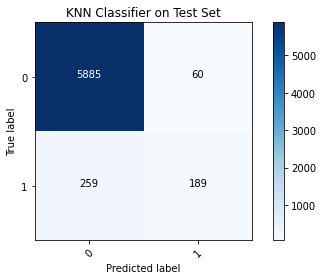

In [94]:
# SMOTE
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train_c, y_train)
#oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
knn = KNN_DM()
model = knn.fit(oversampled_X.toarray(), oversampled_Y, optim=False)
y_pred = model.predict(X_test_c.toarray(), y_test)
report, accuracy, recall, precision, f1 = model.evaluate()
print()

In [29]:
# Moving threshold 
knn = KNeighborsClassifier()
knn.fit(X_train_c.toarray(),y_train)
knn.predict_proba(X_test_c.toarray()) #probability of the class label predict_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [31]:
from sklearn.metrics import roc_auc_score
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = knn.predict_proba(X_test_c.toarray()) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.7348490252913613
Threshold 0.25 -- 0.6617824852817493
Threshold 0.3 -- 0.6617824852817493
Threshold 0.35 -- 0.6617824852817493
Threshold 0.39999999999999997 -- 0.6617824852817493
Threshold 0.44999999999999996 -- 0.590845022828307
Threshold 0.49999999999999994 -- 0.590845022828307
Threshold 0.5499999999999999 -- 0.590845022828307
Threshold 0.6 -- 0.590845022828307
Threshold 0.65 -- 0.5667960771356482
Threshold 0.7000000000000001 -- 0.5667960771356482
Threshold 0.7500000000000001 -- 0.5667960771356482
---Optimum Threshold --- 0.2 --ROC-- 0.7348490252913613


In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train_c.toarray(),y_train)
y_pred = knn.predict(X_test_c.toarray())  # default threshold is 0.5

y_pred = (knn.predict_proba(X_test.toarray())[:,1] >= 0.2).astype(bool) # set threshold as 0.2

In [35]:
f1 = f1_score(y_test, y_pred);
print("f1 after changing the threshold: ", f1)

f1 after changing the threshold:  0.133422281521014


In [224]:
!pip install mlens

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
from mlens.ensemble import SuperLearner
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

ensemble = SuperLearner(scorer=f1_score, verbose=0)
# Build the first layer
ensemble.add([KNeighborsClassifier(algorithm='ball_tree', metric='l1', n_neighbors=2), SVC(C=5)])

# Attach the final meta estimator
ensemble.add_meta(DecisionTreeClassifier())

# Fit ensemble
ensemble.fit(X_train_c.toarray(),y_train)

# Predict
preds = ensemble.predict(X_test_c)

print(classification_report(y_test,preds))
#print("Fit data:\n%r" % ensemble.data)
#print("Prediction score: %.3f" % accuracy_score(y_test, preds)) 

[MLENS] backend: threading


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#, 'auto'
param_grid_knn = {
    'n_neighbors': [2, 5, 10, 15],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'auto'],          
    'metric': ['euclidean', 'l1', 'l2', 'manhattan']
}

kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, cv=10, n_jobs=-1)
kNNModel_grid.fit(x_train_tfidf, y_train_balanced)
print(kNNModel_grid.best_estimator_)

y_pred = kNNModel_grid.predict(x_test_tfidf)

print(f1_score(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


KNeighborsClassifier(algorithm='ball_tree', metric='l1', n_neighbors=2)
0.5182829888712241


95.26044110746129

In [ ]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute'])

['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'precomputed']

In [ ]:
sorted(sklearn.neighbors.VALID_METRICS['kd_tree'])

['chebyshev',
 'cityblock',
 'euclidean',
 'infinity',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'p']

In [217]:
!pip install xgboost

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(x_train_tfidf, label=y_train_balanced)
dtest = xgb.DMatrix(x_test_tfidf, y_test)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
xgb_preds = bst.predict(dtest)
print()
#print(f1_score(y_test,xgb_preds))
#print(accuracy_score(y_test,xgb_preds)*100)
#print("Prediction score xgboost: %.3f" % accuracy_score(y_test, xgb_preds))

ValueError: ignored

In [ ]:
!pip install mlens

     |████████████████████████████████| 227 kB 9.1 MB/s 


In [ ]:
from mlens.ensemble import SuperLearner
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

ensemble = SuperLearner(scorer=f1_score, verbose=0)
# Build the first layer
ensemble.add([KNeighborsClassifier(algorithm='ball_tree', metric='l1', n_neighbors=2), SVC(C=5)])

# Attach the final meta estimator
ensemble.add_meta(DecisionTreeClassifier())

# Fit ensemble
ensemble.fit(x_train_tfidf.toarray(),y_train_balanced)

# Predict
preds = ensemble.predict(x_test_tfidf)
print("Fit data:\n%r" % ensemble.data)
print("Prediction score: %.3f" % accuracy_score(y_test, preds)) 

[MLENS] backend: threading


NameError: ignored

In [ ]:
len(y_train_balanced)
x_train_tfidf.shape

(47566, 33166)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions)

0.5125

Aaron

In [ ]:
##Aaron
X_train = x_train_tfidf
y_train = y_train_balanced
X_test = x_test_tfidf

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
results = []
for i in range(1, 50):
    classifier = DecisionTreeClassifier(random_state=55, max_depth=i)

    model = classifier.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    results.append([i,accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)])

print(results)
print(y_test.value_counts()[0]/len(y_test))

#plot_tree(classifier, max_depth=2)

[[1, 0.1484436101986548, 0.14321687126219704], [2, 0.1484436101986548, 0.14321687126219704], [3, 0.9321132488659472, 0.2359154929577465], [4, 0.23072110120444236, 0.1541107671138631], [5, 0.9164711403097138, 0.28989361702127664], [6, 0.9189738776787111, 0.3272727272727273], [7, 0.923197246988894, 0.37292464878671777], [8, 0.9239793524167058, 0.40586797066014674], [9, 0.9242921945878304, 0.42105263157894735], [10, 0.9253871421867668, 0.4341637010676157], [11, 0.9256999843578915, 0.4431418522860492], [12, 0.9242921945878304, 0.4561797752808988], [13, 0.9258564054434538, 0.4709821428571429], [14, 0.9255435632723291, 0.46993318485523383], [15, 0.9253871421867668, 0.47292817679558014], [16, 0.9244486156733928, 0.4755700325732899], [17, 0.9264820897857031, 0.4812362030905077], [18, 0.9261692476145784, 0.47902869757174393], [19, 0.9266385108712655, 0.48404840484048406], [20, 0.9255435632723291, 0.4870689655172414], [21, 0.9264820897857031, 0.4978632478632478], [22, 0.9272641952135148, 0.50793

In [ ]:
from scipy import sparse
# Stack matrices horizontally (column wise) using hstack().
trainX_tfidf = sparse.hstack([x_train_tfidf, x_train_tfidf])

# Convert Spare Matrix into an Array using toarray() 
trainX_tfidf_arr = trainX_tfidf.toarray()

# Concatenate TF-IDF and Cosine Similarity using numpy.c_[], 
# which is just another column stack.
trainX_tfidf_cos = np.c_[trainX_tfidf_arr, trainX_tfidf_arr]
trainX_tfidf_cos

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def corss_val(model):
    kf = StratifiedKFold(5, shuffle=True, random_state=1)
    auc = cross_val_score(
        model, x_train_tfidf, y_train_balanced, scoring="f1", cv=kf, verbose=10)
    print(auc)
    return auc.mean()
    
corss_val(model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.795) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] END ................................ score: (test=0.800) total time=   3.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


[CV] END ................................ score: (test=0.798) total time=   3.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s


[CV] END ................................ score: (test=0.798) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.1s remaining:    0.0s


[CV] END ................................ score: (test=0.802) total time=   2.0s
[0.79548798 0.79995136 0.79795396 0.79810955 0.80174715]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished


0.7986500004807436

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svm_estimator = svm.SVC()

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision', 'Recall':'recall'}
svm = GridSearchCV(estimator=svm_estimator,
             param_grid={'C': [1, ], 'kernel': ("linear", "rbf"), 'class_weight': (None, "balanced")},
             scoring=scoring,
             refit='AUC',
             return_train_score=True, 
             verbose=10)
svm.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1, class_weight=None, kernel=linear.......................
[CV 1/5; 1/4] END C=1, class_weight=None, kernel=linear; AUC: (train=0.999, test=0.998) F1: (train=0.993, test=0.988) Precision: (train=0.992, test=0.981) Recall: (train=0.994, test=0.995) total time= 1.9min
[CV 2/5; 1/4] START C=1, class_weight=None, kernel=linear.......................
[CV 2/5; 1/4] END C=1, class_weight=None, kernel=linear; AUC: (train=0.999, test=0.998) F1: (train=0.994, test=0.987) Precision: (train=0.992, test=0.980) Recall: (train=0.995, test=0.995) total time= 2.0min
[CV 3/5; 1/4] START C=1, class_weight=None, kernel=linear.......................
[CV 3/5; 1/4] END C=1, class_weight=None, kernel=linear; AUC: (train=0.999, test=0.998) F1: (train=0.994, test=0.987) Precision: (train=0.992, test=0.980) Recall: (train=0.995, test=0.994) total time= 2.0min
[CV 4/5; 1/4] START C=1, class_weight=None, kernel=linear................

In [ ]:
f1_score(y_test, svm.predict(X_test))

0.6241519674355496

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm


#svm_estimator = svm.SVC()

clf_ = svm.SVC(kernel='rbf')
Cs = [1, 10, 100, 1000]
Gammas = [1e-3, 1e-4]
clf = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=2,
                 pre_dispatch='1*n_jobs',
                 n_jobs=1)

clf.fit(X_train, y_train)

scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

AttributeError: ignored

In [ ]:
import nltk
nltk.download("punkt");
import numpy as np
import re
import urllib
SEED = 1234

# Set seed for reproducibility
np.random.seed(SEED)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Split text into sentences
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
book = urllib.request.urlopen(url="https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/harrypotter.txt")
sentences = tokenizer.tokenize(str(book.read()))
print (f"{len(sentences)} sentences")

12443 sentences


In [ ]:
def preprocess(text):
    """Conditional preprocessing on our text."""
    # Lower
    text = text.lower()

    # Spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text) # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()

    # Separate into word tokens
    text = text.split(" ")

    return text

In [ ]:
# Preprocess sentences
print (sentences[11])
sentences = [preprocess(sentence) for sentence in sentences]
print (sentences[11])

Snape nodded, but did not elaborate.
['snape', 'nodded', 'but', 'did', 'not', 'elaborate']


In [ ]:
!pip install gensim

In [ ]:
from gensim.models import FastText


In [ ]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from urllib.request import urlopen
from zipfile import ZipFile

In [ ]:
# Unzip the file (may take ~3-5 minutes)
resp = urlopen("http://nlp.stanford.edu/data/glove.6B.zip")
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()

['glove.6B.50d.txt',
 'glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt']

In [ ]:
# Write embeddings to file
embeddings_file = "glove.6B.{0}d.txt".format(100)
zipfile.extract(embeddings_file)

'/content/glove.6B.100d.txt'

In [ ]:
# Preview of the GloVe embeddings file
with open(embeddings_file, "r") as fp:
    line = next(fp)
    values = line.split()
    word = values[0]
    embedding = np.asarray(values[1:], dtype='float32')
    print (f"word: {word}")
    print (f"embedding:\n{embedding}")
    print (f"embedding dim: {len(embedding)}")

word: the
embedding:
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459


In [ ]:
# Save GloVe embeddings to local directory in word2vec format
word2vec_output_file = "{0}.word2vec".format(embeddings_file)
glove2word2vec(embeddings_file, word2vec_output_file)

(400000, 100)

In [ ]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [ ]:
# Load embeddings (may take a minute)
glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
# (king - man) + woman = ?
# king - man = ? -  woman
glove.most_similar(positive=["woman", "king"], negative=["man"], topn=5)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438)]

In [ ]:
# Get nearest neighbors (excluding itself)
glove.wv.most_similar(positive="goku", topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('gohan', 0.7246542572975159),
 ('bulma', 0.6497020125389099),
 ('raistlin', 0.6443604230880737),
 ('skaar', 0.6316742897033691),
 ('guybrush', 0.6231324672698975)]

In [ ]:
# Reduce dimensionality for plotting
X = glove[glove.wv.vocab]
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn

In [ ]:
SEED = 1234

def set_seeds(seed=1234):
    """Set seeds for reproducibility."""
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # multi-GPU

In [ ]:
set_seeds(seed=SEED)

In [ ]:
# Set device
cuda = True
device = torch.device("cuda" if (
    torch.cuda.is_available() and cuda) else "cpu")
torch.set_default_tensor_type("torch.FloatTensor")
if device.type == "cuda":
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
print (device)

cpu


In [ ]:
# Load data
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/news.csv"
df = pd.read_csv(url, header=0) # load
df = df.sample(frac=1).reset_index(drop=True) # shuffle
df.head()

,title,category
0,Sharon Accepts Plan to Reduce Gaza Army Operat...,World
1,Internet Key Battleground in Wildlife Crime Fight,Sci/Tech
2,July Durable Good Orders Rise 1.7 Percent,Business
3,Growing Signs of a Slowing on Wall Street,Business
4,The New Faces of Reality TV,World


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [ ]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
print (STOPWORDS[:5])
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we']


In [ ]:
def preprocess(text, stopwords=STOPWORDS):
    """Conditional preprocessing on our text unique to our task."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub("", text)

    # Remove words in paranthesis
    text = re.sub(r"\([^)]*\)", "", text)

    # Spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text) # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()

    return text

In [ ]:
# Sample
text = "Great week for the NYSE!"
preprocess(text=text)

'great week nyse'

In [ ]:
# Apply to dataframe
preprocessed_df = df.copy()
preprocessed_df.title = preprocessed_df.title.apply(preprocess)
print (f"{df.title.values[0]}\n\n{preprocessed_df.title.values[0]}")

Sharon Accepts Plan to Reduce Gaza Army Operation, Haaretz Says

sharon accepts plan reduce gaza army operation haaretz says


In [ ]:
import collections
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [ ]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test


In [ ]:
# Data
X = preprocessed_df["title"].values
y = preprocessed_df["category"].values

In [ ]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")

X_train: (84000,), y_train: (84000,)
X_val: (18000,), y_val: (18000,)
X_test: (18000,), y_test: (18000,)
Sample point: china battles north korea nuclear talks → World


In [ ]:
import itertools
import json

In [ ]:
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(y)
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        encoded = np.zeros((len(y)), dtype=int)
        for i, item in enumerate(y):
            encoded[i] = self.class_to_index[item]
        return encoded

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            classes.append(self.index_to_class[item])
        return classes

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {'class_to_index': self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [ ]:
# Encode
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
NUM_CLASSES = len(label_encoder)
label_encoder.class_to_index

{'Business': 0, 'Sci/Tech': 1, 'Sports': 2, 'World': 3}

In [ ]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = label_encoder.encode(y_train)
y_val = label_encoder.encode(y_val)
y_test = label_encoder.encode(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: World
y_train[0]: 3


In [ ]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [21000 21000 21000 21000]
weights: {0: 4.761904761904762e-05, 1: 4.761904761904762e-05, 2: 4.761904761904762e-05, 3: 4.761904761904762e-05}


In [ ]:
import json
from collections import Counter
from more_itertools import take

In [ ]:
class Tokenizer(object):
    def __init__(self, char_level, num_tokens=None,
                 pad_token="<PAD>", oov_token="<UNK>",
                 token_to_index=None):
        self.char_level = char_level
        self.separator = "" if self.char_level else " "
        if num_tokens: num_tokens -= 2 # pad + unk tokens
        self.num_tokens = num_tokens
        self.pad_token = pad_token
        self.oov_token = oov_token
        if not token_to_index:
            token_to_index = {pad_token: 0, oov_token: 1}
        self.token_to_index = token_to_index
        self.index_to_token = {v: k for k, v in self.token_to_index.items()}

    def __len__(self):
        return len(self.token_to_index)

    def __str__(self):
        return f"<Tokenizer(num_tokens={len(self)})>"

    def fit_on_texts(self, texts):
        if not self.char_level:
            texts = [text.split(" ") for text in texts]
        all_tokens = [token for text in texts for token in text]
        counts = Counter(all_tokens).most_common(self.num_tokens)
        self.min_token_freq = counts[-1][1]
        for token, count in counts:
            index = len(self)
            self.token_to_index[token] = index
            self.index_to_token[index] = token
        return self

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            if not self.char_level:
                text = text.split(" ")
            sequence = []
            for token in text:
                sequence.append(self.token_to_index.get(
                    token, self.token_to_index[self.oov_token]))
            sequences.append(np.asarray(sequence))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for sequence in sequences:
            text = []
            for index in sequence:
                text.append(self.index_to_token.get(index, self.oov_token))
            texts.append(self.separator.join([token for token in text]))
        return texts

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {
                "char_level": self.char_level,
                "oov_token": self.oov_token,
                "token_to_index": self.token_to_index
            }
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [ ]:
# Tokenize
tokenizer = Tokenizer(char_level=False, num_tokens=5000)
tokenizer.fit_on_texts(texts=X_train)
VOCAB_SIZE = len(tokenizer)
print (tokenizer)

<Tokenizer(num_tokens=5000)>


In [ ]:
# Sample of tokens
print (take(5, tokenizer.token_to_index.items()))
print (f"least freq token's freq: {tokenizer.min_token_freq}") # use this to adjust num_tokens

[('<PAD>', 0), ('<UNK>', 1), ('39', 2), ('b', 3), ('gt', 4)]
least freq token's freq: 14


In [ ]:
# Convert texts to sequences of indices
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)
preprocessed_text = tokenizer.sequences_to_texts([X_train[0]])[0]
print ("Text to indices:\n"
    f"  (preprocessed) → {preprocessed_text}\n"
    f"  (tokenized) → {X_train[0]}")

Text to indices:
  (preprocessed) → china battles north korea nuclear talks
  (tokenized) → [  16 1491  285  142  114   24]


In [ ]:
# Input
vocab_size = 10
x = torch.randint(high=vocab_size, size=(1,5))
print (x)
print (x.shape)

tensor([[5, 1, 6, 5, 6]])
torch.Size([1, 5])


In [ ]:
embeddings

Embedding(10, 100)

In [ ]:
# Embedding layer
embeddings = nn.Embedding(embedding_dim=100, num_embeddings=vocab_size)
print (embeddings.weight.shape)

torch.Size([10, 100])


In [ ]:
def pad_sequences(sequences, max_seq_len=0):
    """Pad sequences to max length in sequence."""
    max_seq_len = max(max_seq_len, max(len(sequence) for sequence in sequences))
    padded_sequences = np.zeros((len(sequences), max_seq_len))
    for i, sequence in enumerate(sequences):
        padded_sequences[i][:len(sequence)] = sequence
    return padded_sequences


In [ ]:
# 2D sequences
padded = pad_sequences(X_train[0:3])
print (padded.shape)
print (padded)

(3, 6)
[[1.600e+01 1.491e+03 2.850e+02 1.420e+02 1.140e+02 2.400e+01]
 [1.445e+03 2.300e+01 6.560e+02 2.197e+03 1.000e+00 0.000e+00]
 [1.200e+02 1.400e+01 1.955e+03 1.005e+03 1.529e+03 4.014e+03]]


In [ ]:
FILTER_SIZES = list(range(1, 4)) # uni, bi and tri grams

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, max_filter_size):
        self.X = X
        self.y = y
        self.max_filter_size = max_filter_size

    def __len__(self):
        return len(self.y)

    def __str__(self):
        return f"<Dataset(N={len(self)})>"

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        return [X, y]

    def collate_fn(self, batch):
        """Processing on a batch."""
        # Get inputs
        batch = np.array(batch)
        X = batch[:, 0]
        y = batch[:, 1]

        # Pad sequences
        X = pad_sequences(X)

        # Cast
        X = torch.LongTensor(X.astype(np.int32))
        y = torch.LongTensor(y.astype(np.int32))

        return X, y

    def create_dataloader(self, batch_size, shuffle=False, drop_last=False):
        return torch.utils.data.DataLoader(
            dataset=self, batch_size=batch_size, collate_fn=self.collate_fn,
            shuffle=shuffle, drop_last=drop_last, pin_memory=True)


In [ ]:
# Create datasets
max_filter_size = max(FILTER_SIZES)
train_dataset = Dataset(X=X_train, y=y_train, max_filter_size=max_filter_size)
val_dataset = Dataset(X=X_val, y=y_val, max_filter_size=max_filter_size)
test_dataset = Dataset(X=X_test, y=y_test, max_filter_size=max_filter_size)
print ("Datasets:\n"
    f"  Train dataset:{train_dataset.__str__()}\n"
    f"  Val dataset: {val_dataset.__str__()}\n"
    f"  Test dataset: {test_dataset.__str__()}\n"
    "Sample point:\n"
    f"  X: {train_dataset[0][0]}\n"
    f"  y: {train_dataset[0][1]}")

Datasets:
  Train dataset:<Dataset(N=84000)>
  Val dataset: <Dataset(N=18000)>
  Test dataset: <Dataset(N=18000)>
Sample point:
  X: [  16 1491  285  142  114   24]
  y: 3


In [ ]:
# Create dataloaders
batch_size = 64
train_dataloader = train_dataset.create_dataloader(batch_size=batch_size)
val_dataloader = val_dataset.create_dataloader(batch_size=batch_size)
test_dataloader = test_dataset.create_dataloader(batch_size=batch_size)
batch_X, batch_y = next(iter(train_dataloader))
print ("Sample batch:\n"
    f"  X: {list(batch_X.size())}\n"
    f"  y: {list(batch_y.size())}\n"
    "Sample point:\n"
    f"  X: {batch_X[0]}\n"
    f"  y: {batch_y[0]}")

Sample batch:
  X: [64, 14]
  y: [64]
Sample point:
  X: tensor([  16, 1491,  285,  142,  114,   24,    0,    0,    0,    0,    0,    0,
           0,    0])
  y: 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
import math
import torch.nn.functional as F

In [ ]:
EMBEDDING_DIM = 100
HIDDEN_DIM = 100
DROPOUT_P = 0.1

In [ ]:
class CNN(nn.Module):
    def __init__(self, embedding_dim, vocab_size, num_filters,
                 filter_sizes, hidden_dim, dropout_p, num_classes,
                 pretrained_embeddings=None, freeze_embeddings=False,
                 padding_idx=0):
        super(CNN, self).__init__()

        # Filter sizes
        self.filter_sizes = filter_sizes

        # Initialize embeddings
        if pretrained_embeddings is None:
            self.embeddings = nn.Embedding(
                embedding_dim=embedding_dim, num_embeddings=vocab_size,
                padding_idx=padding_idx)
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.embeddings = nn.Embedding(
                embedding_dim=embedding_dim, num_embeddings=vocab_size,
                padding_idx=padding_idx, _weight=pretrained_embeddings)

        # Freeze embeddings or not
        if freeze_embeddings:
            self.embeddings.weight.requires_grad = False

        # Conv weights
        self.conv = nn.ModuleList(
            [nn.Conv1d(in_channels=embedding_dim,
                       out_channels=num_filters,
                       kernel_size=f) for f in filter_sizes])

        # FC weights
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(num_filters*len(filter_sizes), hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, inputs, channel_first=False):

        # Embed
        x_in, = inputs
        x_in = self.embeddings(x_in)

        # Rearrange input so num_channels is in dim 1 (N, C, L)
        if not channel_first:
            x_in = x_in.transpose(1, 2)

        # Conv outputs
        z = []
        max_seq_len = x_in.shape[2]
        for i, f in enumerate(self.filter_sizes):
            # `SAME` padding
            padding_left = int((self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2)
            padding_right = int(math.ceil((self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2))

            # Conv + pool
            _z = self.conv[i](F.pad(x_in, (padding_left, padding_right)))
            _z = F.max_pool1d(_z, _z.size(2)).squeeze(2)
            z.append(_z)

        # Concat conv outputs
        z = torch.cat(z, 1)

        # FC layers
        z = self.fc1(z)
        z = self.dropout(z)
        z = self.fc2(z)
        return z


In [ ]:
def load_glove_embeddings(embeddings_file):
    """Load embeddings from a file."""
    embeddings = {}
    with open(embeddings_file, "r") as fp:
        for index, line in enumerate(fp):
            values = line.split()
            word = values[0]
            embedding = np.asarray(values[1:], dtype='float32')
            embeddings[word] = embedding
    return embeddings

In [ ]:
def make_embeddings_matrix(embeddings, word_index, embedding_dim):
    """Create embeddings matrix to use in Embedding layer."""
    embedding_matrix = np.zeros((len(word_index), embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Create embeddings
embeddings_file = 'glove.6B.{0}d.txt'.format(EMBEDDING_DIM)
glove_embeddings = load_glove_embeddings(embeddings_file=embeddings_file)
embedding_matrix = make_embeddings_matrix(
    embeddings=glove_embeddings, word_index=tokenizer.token_to_index,
    embedding_dim=EMBEDDING_DIM)
print (f"<Embeddings(words={embedding_matrix.shape[0]}, dim={embedding_matrix.shape[1]})>")

<Embeddings(words=5000, dim=100)>


In [ ]:
from string import punctuation
from collections import Counter
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn


def reviews_preprocess(reviews, labels):
    """
    Remove punctuation from review data and replace multiple space with single space.
    Map labels from positive/negative to 1/0.

    Parameters
    ----------
    reviews: list of reviews
    labels: list of labels
    Returns
    -------
    all_reviews: reviews with punctuation removed
    all_words: list of all words occurring in the reviews
    labels: labels with 1 for positive and 0 for negative
    """
    all_reviews = list()
    for text in reviews:
        text = text.lower()
        text = "".join([ch for ch in text if ch not in punctuation])
        # replace multiple spaces with single space
        text = " ".join(text.split())
        all_reviews.append(text)
    all_text = " ".join(all_reviews)
    all_words = all_text.split()

    # map labels: "positive" = 1 and "negative" = 0
    labels = [1 if label.strip() == "positive" else 0 for label in labels]

    return all_reviews, all_words, labels


def reviews_create_word_ids(all_words):
    """
    Creates a dictionary mapping each word to an unique id.
    Parameters
    ----------
    all_words: list of all words occurring in the data
    Returns
    -------
    dictionary with word as key and corresponding id as value
    """
    count_words = Counter(all_words)
    total_words = len(all_words)
    sorted_words = count_words.most_common(total_words)
    word_ids = {w: i + 1 for i, (w, c) in enumerate(sorted_words)}
    return word_ids


def reviews_encode(word_ids, reviews):
    """
    Replace each word in the review with its corresponding id specified in the
    dictionary word_ids

    Parameters
    ----------
    word_ids: dictionary with word as key and id as value
    reviews: review data

    Returns
    -------
    review data with each word replaced by its corresponding id

    """
    encoded_reviews = list()
    for review in reviews:
        encoded_review = list()
        for word in review.split():
            if word not in word_ids.keys():
                # if word is not available in word_ids put 0 in that place
                encoded_review.append(0)
            else:
                encoded_review.append(word_ids[word])
        encoded_reviews.append(encoded_review)

    return encoded_reviews


def reviews_pad(encoded_reviews, sequence_length):
    """
    Pad/truncate encoded reviews to the same sequence length, by adding zeros at the
    beginning or cutting the end.

    Parameters
    ----------
    encoded_reviews: review data with each word encoded with corresponding id
    sequence_length: length to pad/truncate the reviews to

    Returns
    -------
    Encoded reviews padded/truncated to sequence_length

    """
    padded_reviews = np.zeros((len(encoded_reviews), sequence_length), dtype=int)
    for i, review in enumerate(encoded_reviews):
        review_len = len(review)
        if review_len <= sequence_length:
            zeros = list(np.zeros(sequence_length - review_len, dtype=int))
            new = zeros + review
        else:
            new = review[:sequence_length]
        padded_reviews[i, :] = np.array(new)
    return padded_reviews


def reviews_split(padded_reviews, labels):
    """
    Splits data into train, validation and test set with a 80, 10, 10 split.

    Parameters
    ----------
    padded_reviews: reviews padded to the same sequence length
    labels: labels correspoding to reviews

    Returns
    -------
    train_x: Training data
    train_y: Training labels
    valid_x: Validation data
    valid_y: Validation labels
    test_x: Test data
    test_y: Test labels
    """
    train_x = padded_reviews[: int(0.8 * len(padded_reviews))]
    train_y = labels[: int(0.8 * len(padded_reviews))]
    valid_x = padded_reviews[
        int(0.8 * len(padded_reviews)) : int(0.9 * len(padded_reviews))
    ]
    valid_y = labels[int(0.8 * len(padded_reviews)) : int(0.9 * len(padded_reviews))]
    test_x = padded_reviews[int(0.9 * len(padded_reviews)) :]
    test_y = labels[int(0.9 * len(padded_reviews)) :]
    return train_x, train_y, valid_x, valid_y, test_x, test_y


In [ ]:
reviews_lines = df_hate_speech["tweet"]
label_lines = df_hate_speech["tweet"]
raw_reviews, words, labels = reviews_preprocess(reviews_lines, label_lines)
print(raw_reviews[0])
print("First ten words: ", words[:10])
print("First label: ", labels[0])

user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
First ten words:  ['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish']
First label:  0


In [ ]:
# Determine an integer id for each unique word
word_ids = reviews_create_word_ids(words)
print(word_ids.get("the"))
print(word_ids.get("movie"))

2
499


In [ ]:
# Encode each word in the review by its unique identifier
encoded_reviews = reviews_encode(word_ids, raw_reviews)
print(raw_reviews[0])
print(encoded_reviews[0])

user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
[1, 34, 4, 261, 10, 16392, 7, 10, 20, 3338, 100, 6525, 93, 254, 253, 93, 7974, 472]


In [ ]:
# Padding/truncating all reviews to the same length. Although this isn't strictly
# necessary, it facilitates batch processing: all inputs of a batch need to have the
# same length.
sequence_length = 200
padded_reviews = reviews_pad(encoded_reviews, sequence_length)
print(padded_reviews[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
def reviews_split(padded_reviews, labels):
    """
    Splits data into train, validation and test set with a 80, 10, 10 split.

    Parameters
    ----------
    padded_reviews: reviews padded to the same sequence length
    labels: labels correspoding to reviews

    Returns
    -------
    train_x: Training data
    train_y: Training labels
    valid_x: Validation data
    valid_y: Validation labels
    test_x: Test data
    test_y: Test labels
    """
    train_x = padded_reviews[: int(0.8 * len(padded_reviews))]
    train_y = labels[: int(0.8 * len(padded_reviews))]
    valid_x = padded_reviews[
        int(0.8 * len(padded_reviews)) : int(0.9 * len(padded_reviews))
    ]
    valid_y = labels[int(0.8 * len(padded_reviews)) : int(0.9 * len(padded_reviews))]
    test_x = padded_reviews[int(0.9 * len(padded_reviews)) :]
    test_y = labels[int(0.9 * len(padded_reviews)) :]
    return train_x, train_y, valid_x, valid_y, test_x, test_y


def reviews_create_dataloaders(
    train_x, train_y, valid_x, valid_y, test_x, test_y, batch_size=50
):
    """
    Creates PyTorch data loaders

    Parameters
    ----------
    train_x: Training data
    train_y: Training labels
    valid_x: Validation data
    valid_y: Validation labels
    test_x: Test data
    test_y: Test labels
    batch_size: size of the batch

    Returns
    -------
    PyTorch data loaders for train, validation and test
    """
    # create Tensor Dataset
    train_data = TensorDataset(torch.LongTensor(train_x), torch.IntTensor(train_y))
    valid_data = TensorDataset(torch.LongTensor(valid_x), torch.IntTensor(valid_y))
    test_data = TensorDataset(torch.LongTensor(test_x), torch.IntTensor(test_y))

    # dataloader
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    return train_loader, valid_loader, test_loader


def reviews_train(
    net,
    train_loader,
    valid_loader,
    lr=0.01,
    lr_decay=0.0001,
    epochs=3,
    clip=5,
    print_every=5,
    criterion=nn.BCELoss(),
    device=DEVICE,
):
    """
    Train a network on the review data

    Parameters
    ----------
    net: Initialized model
    train_loader: Dataloader containing the training data
    valid_loader: Dataloader containing the validation data
    lr: learning rate
    epochs: number of epochs
    clip: clip gradients at this value
    print_every: print current train and validation loss every x steps
    criterion: Loss function
    device: device to train on - cpu or cuda
    """
    optimizer = torch.optim.Adagrad(
        [param for param in net.parameters() if param.requires_grad == True], lr=lr, lr_decay=lr_decay,
    )
    batch_processed_counter = 0

    net = net.to(device)
    criterion = criterion.to(device)

    net.train()

    # train for some number of epochs
    for e in range(epochs):
        valid_counter = 0
        epoch_val_losses = []
        losses = []
        print("Starting epoch", e + 1)

        # batch loop
        for inputs, labels in train_loader:
            batch_processed_counter += 1
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero accumulated gradients
            net.zero_grad()

            # get the output from the model
            # output, h = net(inputs, h)
            output = net(inputs)

            # calculate the loss and perform backprop
            loss = criterion(output.squeeze(), labels.float())
            losses.append(loss.item())
            loss.backward()
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs /
            # LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            optimizer.step()

            # loss stats
            if batch_processed_counter % print_every == 0:
                valid_counter += 1
                # Get validation loss
                val_losses = []
                net.eval()
                num_correct = 0
                for inputs, labels in valid_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    output = net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())

                    val_losses.append(val_loss.item())
                    epoch_val_losses.append(val_loss.item())
                    
                    # convert output probabilities to predicted class (0 or 1)
                    pred = torch.round(output.squeeze())  # rounds to the nearest integer

                    # compare predictions to true label
                    correct_tensor = pred.eq(labels.float().view_as(pred)).cpu()
                    correct = np.squeeze(correct_tensor.numpy())
                    num_correct += np.sum(correct)
                    
                val_acc = num_correct / len(valid_loader.dataset)
                net.train()
                print(
                    "Epoch: {:2d}/{:2d}   ".format(e + 1, epochs),
                    "Batch: {:2d}  ".format(batch_processed_counter),
                    "Batch loss: {:.6f}   ".format(loss.item()),
                    "Val loss: {:.6f}".format(np.mean(val_losses)),
                    "Val acc: {:.6f}".format(val_acc),
                )
        print(len(epoch_val_losses))

        print(
            (
                "Finished epoch {}. Average batch loss: {}. "
                "Average validation loss: {}"
            ).format(e + 1, np.mean(losses), np.mean(epoch_val_losses))
        )


def reviews_test(net, test_loader, criterion=nn.BCELoss(), device=DEVICE):
    """
    Evaluate a trained network on the review data.

    Parameters
    ----------
    net: trained model
    test_loader: Dataloader containing the training data
    criterion: Loss function
    device: device to train on - cpu or cuda
    """
    test_losses = []  # track loss
    num_correct = 0

    correct = 0  # number of correct predictions
    total = 0  # total number of examples

    net.eval()

    net = net.to(device)
    criterion = criterion.to(device)

    # iterate over test data
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        output = net(inputs)

        # calculate loss
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred)).cpu()
        correct = np.squeeze(correct_tensor.numpy())
        num_correct += np.sum(correct)

        total += labels.shape[0]


    # -- stats! -- ##
    # avg test loss
    print("Test loss: {:.3f}".format(np.mean(test_losses)))

    # accuracy over all test data
    test_acc = num_correct / len(test_loader.dataset)
    print("Test accuracy: {:.3f}".format(test_acc))


In [ ]:
# Split dataset into 80% training, 10% test, and 10% validation Dataset
train_x, train_y, valid_x, valid_y, test_x, test_y = reviews_split(
    padded_reviews, labels
)
print(len(train_y), len(valid_y), len(test_y))

25569 3196 3197


In [ ]:
# Create data loaders for training
train_loader, valid_loader, test_loader = reviews_create_dataloaders(
    train_x, train_y, valid_x, valid_y, test_x, test_y
)

In [ ]:
# ME
class SimpleLSTM(nn.Module):
    """
    The RNN model that will be used to perform sentiment analysis.
    """

    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        num_layers=1,
        lstm_dropout_prob=0.5,
        dropout_prob=0.3,
    ):
        """
        Initialize the model by setting up the layers

        Parameters
        ----------
        vocab_size: number of unique words in the reviews
        embeddings_dim: size of the embeddings
        hidden_dim: dimension of the LSTM output
        num_layers: number of LSTM layers
        lstm_dropout_prob: dropout applied between the LSTM layers
        dropout_prob: dropout applied before the fully connected layer
        """
        super().__init__()

        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=lstm_dropout_prob, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

        # YOUR CODE HERE

    def forward(self, x):
        """
        Perform a forward pass of our model on some input and hidden state.

        Parameters
        ----------
        x: batch as a (batch_size, sequence_length) tensor

        Returns
        -------
        Probability of positive class.
        """
        # init hidden layer, which is needed for the LSTM
        batch_size = len(x)
        hidden = self.init_hidden(batch_size)
        # YOUR CODE HERE
        #x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out        

    def init_hidden(self, batch_size):
        """
        Initialize hidden state.

        Returns
        -------
        Empty hidden LSTM state.
        """

        # Create two new tensors with sizes num_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters())  # only used to determine device

        hidden = (
            weight.new(self.num_layers, batch_size, self.hidden_dim).zero_(),
            weight.new(self.num_layers, batch_size, self.hidden_dim).zero_(),
        )

        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(word_ids) + 1  # +1 for the 0 padding
embedding_dim = 100
hidden_dim = 64
num_layers = 1


# this may raise a warning when num_layers=1 (which is fine)
# make sure to reinizialize the model if you want to train multiple times
model = SimpleLSTM(vocab_size, embedding_dim, hidden_dim, num_layers).to(DEVICE)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
embeddings = nn.Embedding(len(word_ids) + 1, 100).to(DEVICE)

In [ ]:
@torch.no_grad()
def reviews_load_embeddings(
    embedding_layer, word_ids, pretrained_embeddings_file="data/word-embeddings.txt"
):
    """Load pretrained embeddings into an embedding layer.

    Updates the weights of the embedding layer with with the embeddings given in the
    provided word embeddings file.

    Parameters
    ----------
    embedding_layer: torch.nn.Embedding used in the model
    word_ids: dictionary mapping each word to its unique identifier
    pretrained_embeddings_file: path to the file containing pretrained embeddings

    """
    print("Initializing embedding layer with pretrained word embeddings...")
    embeddings_index = dict()
    words_initialized = 0
    with open(pretrained_embeddings_file, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            encoded_word = word_ids.get(word)
            if encoded_word is not None:
                words_initialized += 1
                embedding_layer.weight[encoded_word, :] = torch.from_numpy(
                    np.asarray(values[1:], dtype="float32")
                )
    print(
        "Initialized {}/{} word embeddings".format(
            words_initialized, embedding_layer.num_embeddings
        )
    )

In [ ]:
reviews_load_embeddings(embeddings, word_ids, embeddings_file )

Initializing embedding layer with pretrained word embeddings...
Initialized 20948/47522 word embeddings


In [ ]:
# Fit and evaluate a model with pretrained embeddings with fine-tuning.
# YOUR CODE HERE

# Fit and evaluate a model with pretrained embeddings without fine-tuning
# YOUR CODE HERE
# Instantiate the model w/ hyperparams
vocab_size = len(word_ids) + 1  # +1 for the 0 padding
embedding_dim = 100
hidden_dim = 64
num_layers = 1

model = SimpleLSTM(vocab_size, embedding_dim, hidden_dim, num_layers).to(DEVICE)
model.embedding = embeddings
model.embedding.weight.requires_grad = True
#print(model.named_parameters)
# Fit and evaluate a model (without pretrained embeddings)
n_epochs = 5
# YOUR CODE HERE
reviews_train(model, train_loader, valid_loader, epochs=n_epochs, device=DEVICE)
reviews_test(model, test_loader, device=DEVICE)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Starting epoch 1
Epoch:  1/ 5    Batch:  5   Batch loss: 0.040715    Val loss: 0.020985 Val acc: 1.000000
Epoch:  1/ 5    Batch: 10   Batch loss: 0.008147    Val loss: 0.006501 Val acc: 1.000000
Epoch:  1/ 5    Batch: 15   Batch loss: 0.004446    Val loss: 0.004354 Val acc: 1.000000
Epoch:  1/ 5    Batch: 20   Batch loss: 0.004189    Val loss: 0.003352 Val acc: 1.000000
Epoch:  1/ 5    Batch: 25   Batch loss: 0.003335    Val loss: 0.002743 Val acc: 1.000000
Epoch:  1/ 5    Batch: 30   Batch loss: 0.002622    Val loss: 0.002354 Val acc: 1.000000
Epoch:  1/ 5    Batch: 35   Batch loss: 0.002305    Val loss: 0.002080 Val acc: 1.000000
Epoch:  1/ 5    Batch: 40   Batch loss: 0.001956    Val loss: 0.001864 Val acc: 1.000000
Epoch:  1/ 5    Batch: 45   Batch loss: 0.002153    Val loss: 0.001688 Val acc: 1.000000
Epoch:  1/ 5    Batch: 50   Batch loss: 0.001736    Val loss: 0.001545 Val acc: 1.000000
Epoch:  1/ 5    Batch: 55   Batch loss: 0.001545    Val loss: 0.001430 Val acc: 1.000000
Epoc

In [ ]:
# Create embeddings
embeddings_file = 'glove.6B.{0}d.txt'.format(embedding_dim)
glove_embeddings = load_glove_embeddings(embeddings_file=embeddings_file)
embedding_matrix = make_embeddings_matrix(
    embeddings=glove_embeddings, word_index=vocab_size,
    embedding_dim=embedding_dim)
print (f"<Embeddings(words={embedding_matrix.shape[0]}, dim={embedding_matrix.shape[1]})>")

TypeError: ignored